# Clustering the wine Dataset

### Libraries

In [63]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import scale

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import Toolbox.plotting_tools as plt_tools
import Toolbox.clustering_tools as clstr_tools

from sklearn import metrics
from sklearn.mixture import GaussianMixture

import importlib
importlib.reload(plt_tools)

import seaborn as sns
sns.set()

### Data

In [30]:
X, y = load_wine(return_X_y=True)
X_scaled = scale(X)
X= X_scaled
n_samples, n_features = X.shape

k_list = list(range(2,21))

### Basic Stats

In [74]:
n_samples, n_features = X.shape
print("This dataset has %d samples and %d features" % X.shape, sep='\n')

This dataset has 178 samples and 13 features


## Visualizing The Data
### PCA
Here we use PCA to reduce the dimensions of the wine data to something that we can visualize more easily

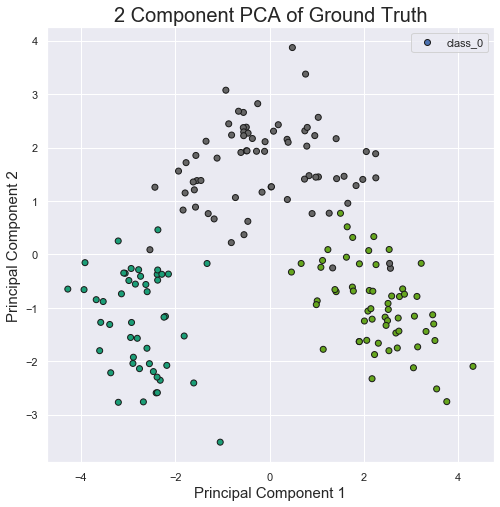

In [56]:
# 2D Plot
plt_tools.visualize_wine_ground_truth_2d()

## KMeans

### Parameter Estimation

Lets try finding the best value of k by comparing silhouette scores.

In [16]:
k_with_highest_score, k_labels_dict, scores = clstr_tools.benchmark_kmeans(X_scaled, k_list, print_rslt=False)

print("According to silhouette scores, {0} is the optimal number of clusters".format(k_with_highest_score))

According to silhouette scores, 3 is the optimal number of clusters


For some reason, 2 seems to be the best score in both cases. We know that is *should* be 3


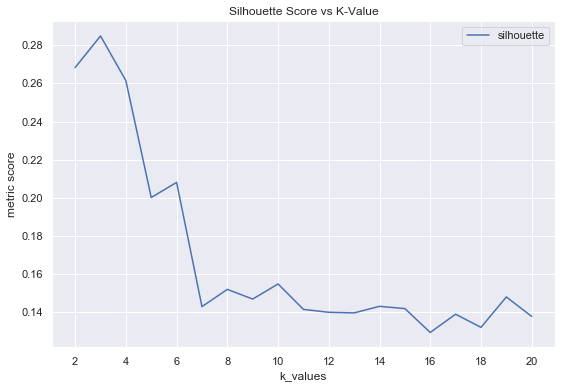

In [39]:
plt.figure(figsize=(9,6))
silhouette_line = plt.plot(k_list, list(scores.values()), label="silhouette")
#plt.plot(k_list, metric_scores_dict['s_dbw'], label="S_Dbw")
plt.title("Silhouette Score vs K-Value")
plt.legend()
plt.grid(b=True)
plt.xlabel("k_values")
plt.ylabel("metric score")
plt.xticks(np.arange(2,21,2))
plt.show()

## Visualize the clusters
#### All the clusters

Lets look at the ideal clusters as suggested by the silhouette score vs the true number


### 2 Clusters

<Figure size 576x432 with 0 Axes>

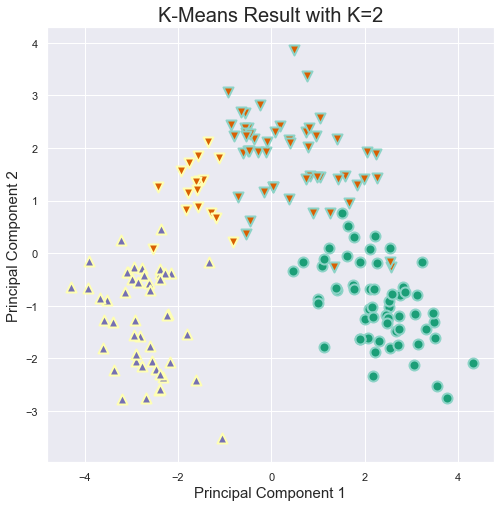

In [64]:
k=2
plt_tools.visualize_clusters(X_scaled, k_labels_dict[k], dims=2,labels=y)
plt.title("K-Means Result with K=%d" % k, fontsize = 20)
plt.show()

### 3 Clusters

<Figure size 576x432 with 0 Axes>

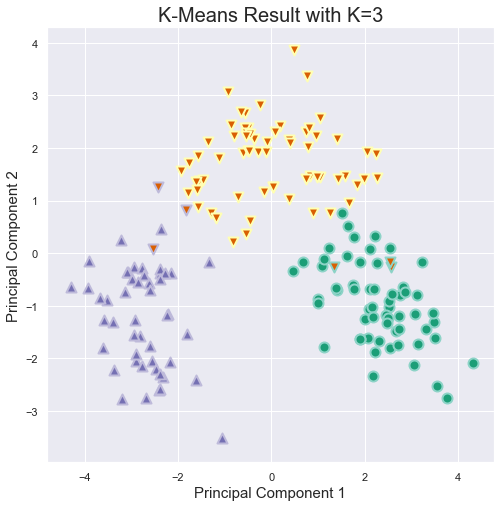

In [65]:
k=3
plt_tools.visualize_clusters(X, k_labels_dict[k], dims=2,labels=y)
plt.title("K-Means Result with K=%d" % k, fontsize = 20)
plt.show()

### 6 Clusters

<Figure size 576x432 with 0 Axes>

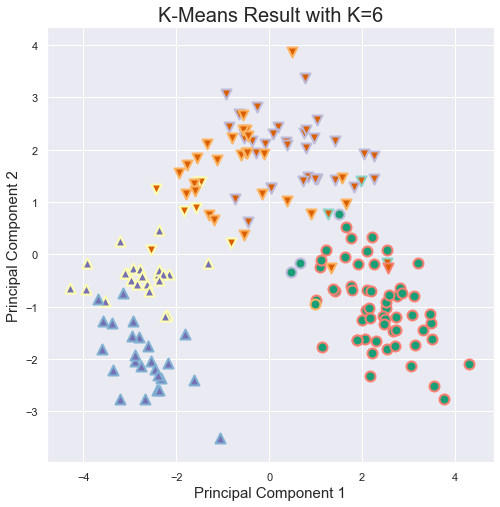

In [66]:
k=6
plt_tools.visualize_clusters(X, k_labels_dict[k], dims=2, labels=y)
plt.title("K-Means Result with K=%d" % k, fontsize = 20)
plt.show()

### 11 Clusters

<Figure size 576x432 with 0 Axes>

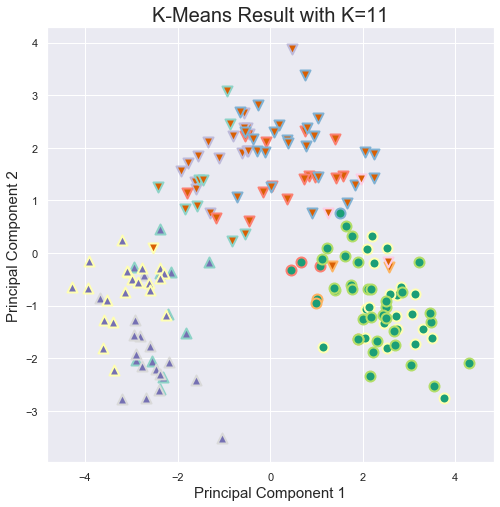

In [67]:
k=11
plt_tools.visualize_clusters(X, k_labels_dict[k], dims=2,labels=y)
plt.title("K-Means Result with K=%d" % k, fontsize = 20)
plt.show()

#### What about the next local minima, k = 13?

<Figure size 576x432 with 0 Axes>

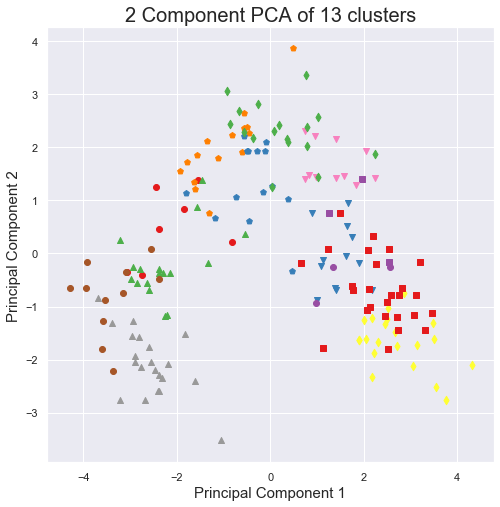

In [68]:
plt_tools.visualize_clusters(X, k_labels_dict[13])

#### KMeans conclusion

The correct numnber of clusters is 3, but the silhouette score suggests otherwise. This is likely the result of the clusters in the Iris data set not being well-separated.

# DBSCAN

## Choosing eps and min_pts 

### min_pts
Some researches suggest min_pts should be set to 4, but usually only for 2D data. Others say to use $min\_pts = 2 \times data\_dimensionality$. We'll try both and then compare the results

### eps
eps can be found by measuring the distance of all points to their $j^{th}$ nearest neighbour. J is normally selected to be equal to $min\_pts - 1$

## k-distance plot

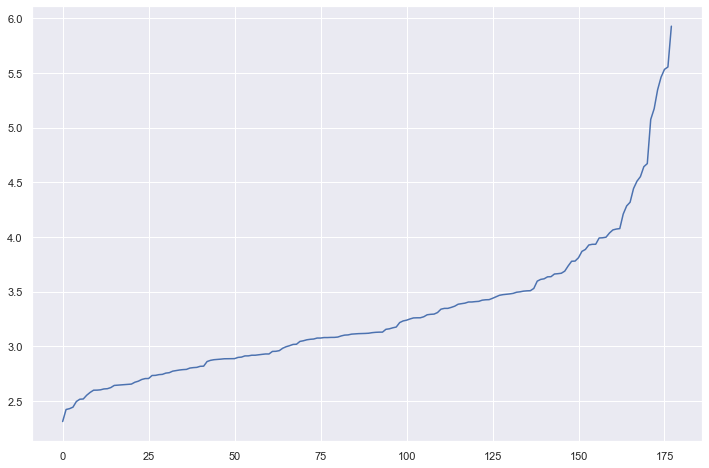

In [75]:
min_pts = 26
plt.figure(figsize=(12,8))
plt_tools.get_k_distance_plot(X_scaled, min_pts-1)

plt.show()

Let's go with $eps = 27$

In [79]:
eps = 3.5
np.random.seed(42)
db = DBSCAN(eps=eps, min_samples=min_pts).fit(X_scaled)
DBSCAN_estimated_labels_1 = db.labels_
est_labels = DBSCAN_estimated_labels_1
n_clusters_ = len(set(est_labels)) - (1 if -1 in est_labels  else 0)
n_noise_ = list(est_labels ).count(-1)

print("min_pts: %d, \t eps: %f" % (min_pts, eps))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

min_pts: 26, 	 eps: 3.500000
Estimated number of clusters: 1
Estimated number of noise points: 9


That sounds alright. Let's see what this looks like
###  DBSCAN Cluster Visualization

<Figure size 576x432 with 0 Axes>

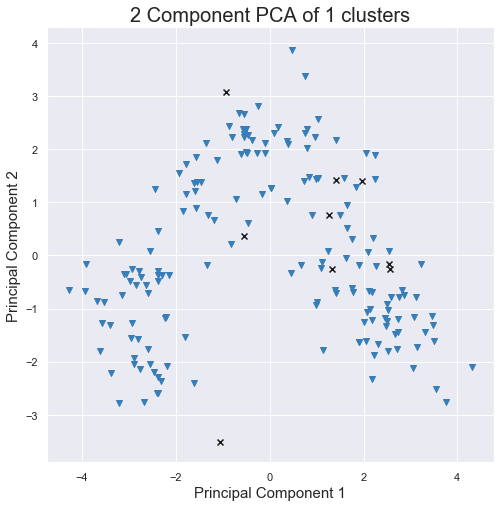

In [80]:
plt_tools.visualize_clusters(X, DBSCAN_estimated_labels_1 , dims=2)

## lower eps

In [88]:
min_pts = 26
eps = 4
np.random.seed(42)
db = DBSCAN(eps=eps, min_samples=min_pts).fit(X_scaled)
DBSCAN_estimated_labels_2 = db.labels_
est_labels = DBSCAN_estimated_labels_2
n_clusters_ = len(set(est_labels)) - (1 if -1 in est_labels  else 0)
n_noise_ = list(est_labels).count(-1)

print("min_pts: %d, \t eps: %f" % (min_pts, eps))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

min_pts: 26, 	 eps: 4.000000
Estimated number of clusters: 1
Estimated number of noise points: 6


<Figure size 576x432 with 0 Axes>

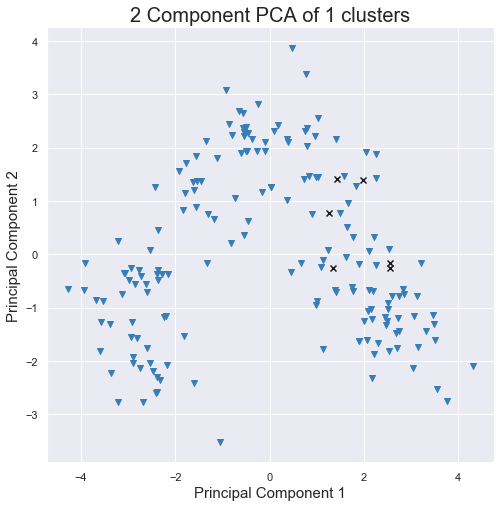

In [89]:
plt_tools.visualize_clusters(X, DBSCAN_estimated_labels_2 , dims=2)

When using min_pts=4, the lower eps value seems work better

In any case, the result is not great. What if we try with a higher min_pts?

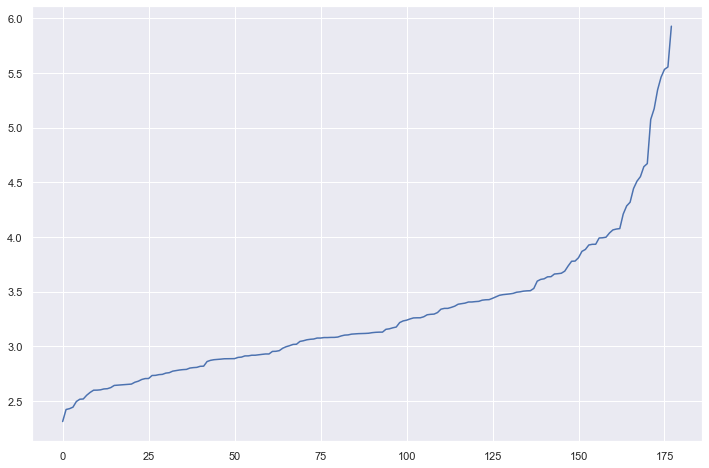

In [85]:
min_pts = 26
plt.figure(figsize=(12,8))
plt_tools.get_k_distance_plot(X_scaled, min_pts-1)

Let's go with $eps = 0.875$

In [56]:
min_pts = 8
eps = 0.875
np.random.seed(42)
db = DBSCAN(eps=eps, min_samples=min_pts).fit(X_scaled)
DBSCAN_estimated_labels_3 = db.labels_
est_labels = DBSCAN_estimated_labels_3
n_clusters_ = len(set(est_labels)) - (1 if -1 in est_labels  else 0)
n_noise_ = list(est_labels ).count(-1)

print("min_pts: %d, \t eps: %f" % (min_pts, eps))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

min_pts: 8, 	 eps: 0.875000
Estimated number of clusters: 2
Estimated number of noise points: 7


In [83]:
plt_tools.visualize_clusters(X, DBSCAN_estimated_labels_3 , dims=2)
plt_tools.visualize_iris_ground_truth_2d()

NameError: name 'DBSCAN_estimated_labels_3' is not defined

##### Lets try the lower eps value of 0.5

In [91]:
min_pts = 8
eps = 0.5
np.random.seed(42)
db = DBSCAN(eps=eps, min_samples=min_pts).fit(X_scaled)
DBSCAN_estimated_labels_4 = db.labels_
est_labels = DBSCAN_estimated_labels_4
n_clusters_ = len(set(est_labels)) - (1 if -1 in est_labels  else 0)
n_noise_ = list(est_labels ).count(-1)

print("min_pts: %d, \t eps: %f" % (min_pts, eps))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

min_pts: 8, 	 eps: 0.500000
Estimated number of clusters: 0
Estimated number of noise points: 178


<Figure size 576x432 with 0 Axes>

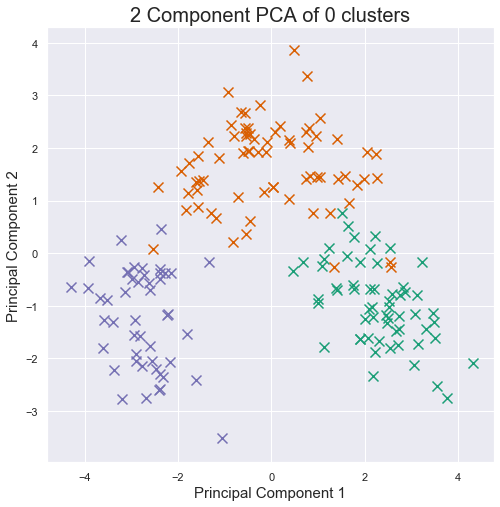

In [92]:
#plt_tools.visualize_iris_ground_truth_2d()
plt_tools.visualize_clusters(X_scaled, DBSCAN_estimated_labels_4 , dims=2,labels=y)

For each value of min_pts, the lower eps value gives a 'better' result


## Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

In [78]:
models = [GaussianMixture(k,'full',
                          random_state=42).fit(X) for k in k_list]

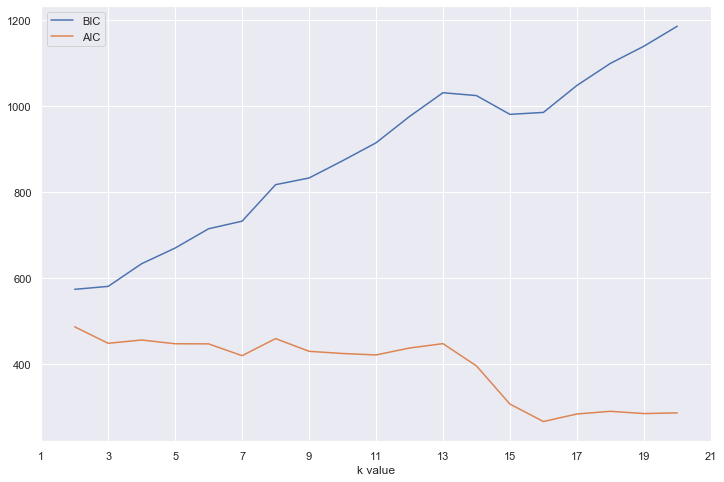

In [79]:
plt.figure(figsize=(12,8))
plt.plot(k_list, [m.bic(X) for m in models], label='BIC')
plt.plot(k_list, [m.aic(X) for m in models], label="AIC")
plt.legend(loc='best')
plt.xlabel('k value')
plt.xticks(np.arange(1,22,2))
plt.show()

<Figure size 576x432 with 0 Axes>

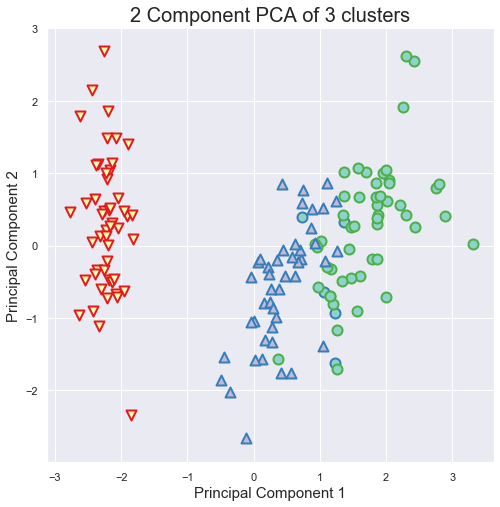

In [102]:
best_model = models[np.where(np.array(k_list) == 3)[0][0]]
best_model.fit(X_scaled)
p_labels = best_model.predict(X_scaled)
plt_tools.visualize_clusters(X_scaled, p_labels , dims=2,labels=y)
plt.show()

In [63]:
type(k_list)

list

In [64]:
np.where(k_list == 3)

(array([], dtype=int64),)